# Data Visualisation

# Importing relevant libraries

In [ ]:
#import libries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objects as go


In [2]:
#load dataset
df = pd.read_csv('./datasets/cleaned_v1.csv', low_memory = False)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,transaction_date,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,political_parties,remaining_lease_days,blk_num,blk_alpha
0,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977-01-01,9000.0,PAP,31411,309,-
1,1990-01-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977-01-01,6000.0,PAP,31411,309,-
2,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977-01-01,8000.0,PAP,31411,309,-
3,1990-01-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977-01-01,6000.0,PAP,31411,309,-
4,1990-01-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976-01-01,47200.0,PAP,31046,216,-


In [4]:
df.dtypes

transaction_date         object
town                     object
flat_type                object
storey_range             object
floor_area_sqm          float64
flat_model               object
lease_commence_date      object
resale_price            float64
political_parties        object
remaining_lease_days      int64
blk_num                   int64
blk_alpha                object
dtype: object

In [5]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'])

In [6]:
df.dtypes

transaction_date        datetime64[ns]
town                            object
flat_type                       object
storey_range                    object
floor_area_sqm                 float64
flat_model                      object
lease_commence_date     datetime64[ns]
resale_price                   float64
political_parties               object
remaining_lease_days             int64
blk_num                          int64
blk_alpha                       object
dtype: object

## Correlation matrix

In [7]:
columns = list(df.columns)

In [8]:
cat_df = pd.DataFrame()
num_df = pd.DataFrame()
for i in columns:
    if 'object' == str(df[i].dtypes):
        cat_df = pd.concat([cat_df, df[i]], axis = 1)
    else:
        num_df = pd.concat([num_df, df[i]], axis = 1)

In [9]:
matrix = num_df.corr()

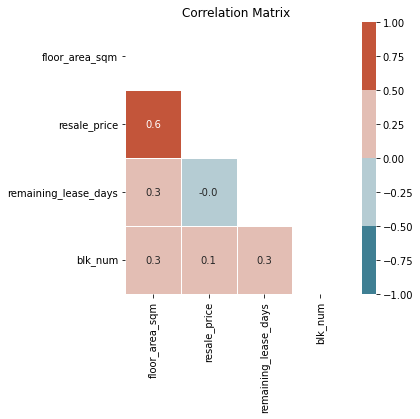

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
mask = np.triu(np.ones_like(matrix))
sns.heatmap(matrix,
            cmap=sns.diverging_palette(220,20,n=4),
            annot = True,
           vmin = -1, vmax=1,
           linewidth = 0.5,
           mask = mask,
           fmt='.1f')
plt.title('Correlation Matrix')
plt.show()
plt.tight_layout()
# fig.savefig("./Images/heatmap.png")

Correlation matrix observations:

| S/n | Observations | 
| -------- | -------- | 
| 1 | +ve correlation between resale_price to floor_area_sqm | 

More graph visualisations must been done to further understand this dataset.

## Examining dataframe basic statistics

In [11]:
df.describe()

,floor_area_sqm,resale_price,remaining_lease_days,blk_num
count,899002.000000,8.990020e+05,899002.000000,899002.000000
mean,95.706650,3.125128e+05,29539.674042,347.968612
std,25.888507,1.634839e+05,3820.624276,255.113169
min,28.000000,5.000000e+03,15282.000000,1.000000
25%,73.000000,1.900000e+05,27089.000000,126.000000
50%,93.000000,2.900000e+05,30195.000000,301.500000
75%,113.000000,4.070000e+05,32660.000000,533.000000
max,307.000000,1.418000e+06,36770.000000,997.000000


Remarks: 
1. This shows the standard statistics of dataframe
2. notable features are, resale the mean of resale prices of hdbs are 300k+

## Graph visualization

### Histogram: Resale Price

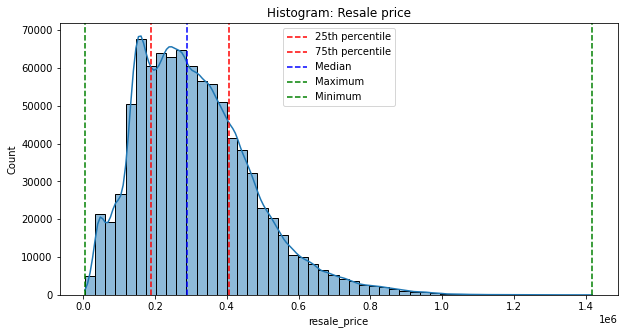

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Histogram: Resale price')
sns.histplot(x = df['resale_price'], kde = True, bins = 50)

# calculate the interquartile range
q1 = np.percentile(df['resale_price'], 25)
q3 = np.percentile(df['resale_price'], 75)
iqr = q3 - q1

ax.axvline(q1, color='red', linestyle='--', label='25th percentile')
ax.axvline(q3, color='red', linestyle='--', label='75th percentile')

# calculate median, maximum, and minimum values
median = np.median(df['resale_price'])
maximum = np.max(df['resale_price'])
minimum = np.min(df['resale_price'])

ax.axvline(median, color='b', linestyle='--', label='Median')
ax.axvline(maximum, color='g', linestyle='--', label='Maximum')
ax.axvline(minimum, color='g', linestyle='--', label='Minimum')

plt.legend()

Remarks:

1. This shows the histogram of resale price that is slightly skewed to the left.
2. It is observed that majority of houses are sold in 300k range.
3. The highest is sold for ~1.4 million where as the lowest is sold for <100k.
4. 25% of houses are sold around 250k and 75% of houses are sold around 400k

### Histogram: Demand of Resale Houses Over Time

In [13]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
hse_demand = df['transaction_date'].dt.year

<Axes: title={'center': 'Histogram: Housing Demands'}, xlabel='transaction_date', ylabel='Count'>

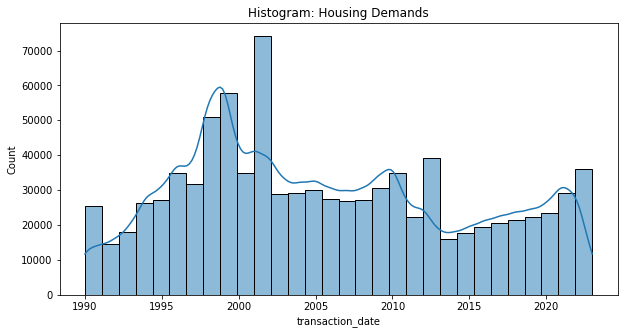

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Histogram: Housing Demands')
sns.histplot(x = hse_demand, kde = True, bins = 30)

Observations:
1. There is a spike in 1995-1999. This is due to HDB announcing that singles above 35 years old are eligible to purchase HDB resale flats but limited to 3 room flats at selected location. [link](https://www.todayonline.com/singapore/timeline-singapores-public-housing-policy-singles)
2. It is observed that there is a another spike in housing demands from 2000-2004. This is due to the new policy from the HDB in 2001: Singles are now allowed to buy HDB resale 3 room flats in central areas. And in 2004: Singles are allowed to purchase 4-5 room flats in any location. [link](https://www.todayonline.com/singapore/timeline-singapores-public-housing-policy-singles)



### Lineplot: Resale Houses Prices Over Time

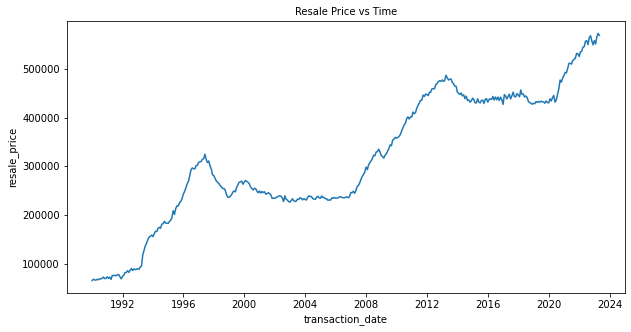

In [15]:
plt.figure(figsize=(10,5))

sns.lineplot(x = df['transaction_date'], y = df['resale_price'], errorbar=None)

# Generate title and labels.
plt.title('Resale Price vs Time', fontsize=10)

# Enlarge tick marks.
plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

Observations:

It is observed that there prices of houses are consistently rising over the years. This could be due to the following reasons:
1. There is an overall increase in prices of private properties, which leads to an increase in demand for HDB resale flats. [link](https://www.redbrick.sg/blog/top-5-reasons-behind-the-rise-in-hdb-resale-prices/)
2. Low interest rates of resale flats. Singapore Overnight Rate Average (SORA), the rate most bank uses for bank loan has dropped from 0.3%(in 2020) to 0.16%(2021). This encourages buyers to purchase properties at a lower cost of borrowing and leveraging. Though interest rates may fluctuate, this incentivized many to enter the resale market with prospects of decreasing morgage repayments in the long run.[link](https://www.redbrick.sg/blog/top-5-reasons-behind-the-rise-in-hdb-resale-prices/)
3. Price stability of HDBs. As a large population of Singapore's population resides in HDBs, it is not a surprise that the public housing is seen as a necessity in Singapore. This translates to, even with poor econimic outlook, the demand for HDB resale flats is unlikely to be shaken. [link](https://www.redbrick.sg/blog/top-5-reasons-behind-the-rise-in-hdb-resale-prices/)

### Countplot: Count Of Houses In Various Towns 

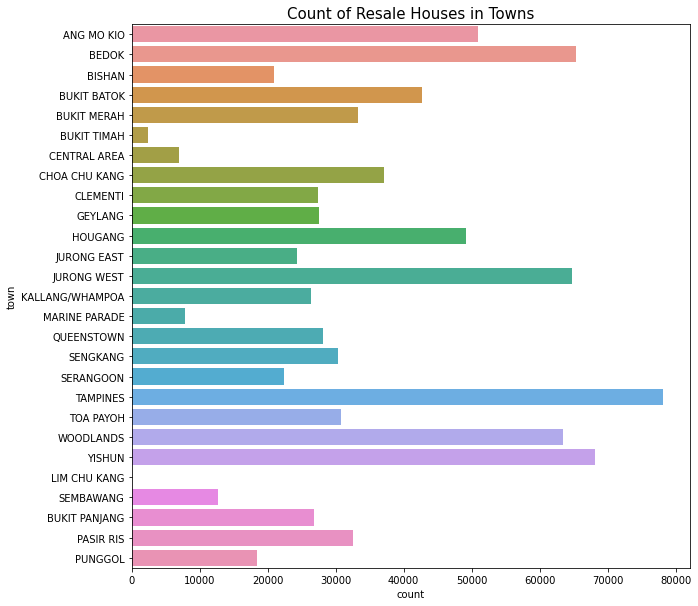

In [16]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y=df['town'])
plt.title('Count of Resale Houses in Towns', fontsize=15);
# ax.tick_params(axis='y', which='major', pad=10)

Observations:

1. This count plot shows the resale housing in certain towns. Right off the bat, Tampines, bedok, woodlands and yishun have one of the highest counts in resale.
2. Whereas Lim Chu Kang is the lowest in count for resale housing.
3. This also indicates that there is high population of people living in these areas.

### Lineplot: Floor Area Over Time

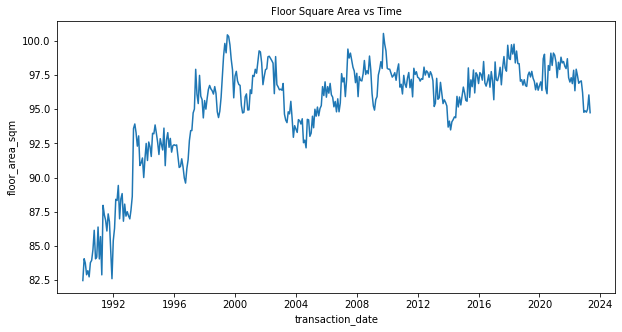

In [17]:
plt.figure(figsize=(10,5))

sns.lineplot(x = df['transaction_date'], y = df['floor_area_sqm'], errorbar=None)

# Generate title and labels.
plt.title('Floor Square Area vs Time', fontsize=10)

# Enlarge tick marks.
plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

Observations:
1. It is observed that there is a there was a trend of floor square area increasing from 1990s to 2000. From there, the house sizes are seen to be fluctuating around 97.5 to 95 square area. 
2. This shows that the general sizes of resale houses are bigger as compared to resale houses in 1990s. This indicates that it is not necessary to buy old resale houses as they are bigger.

### Countplot: Count Of Flat Model

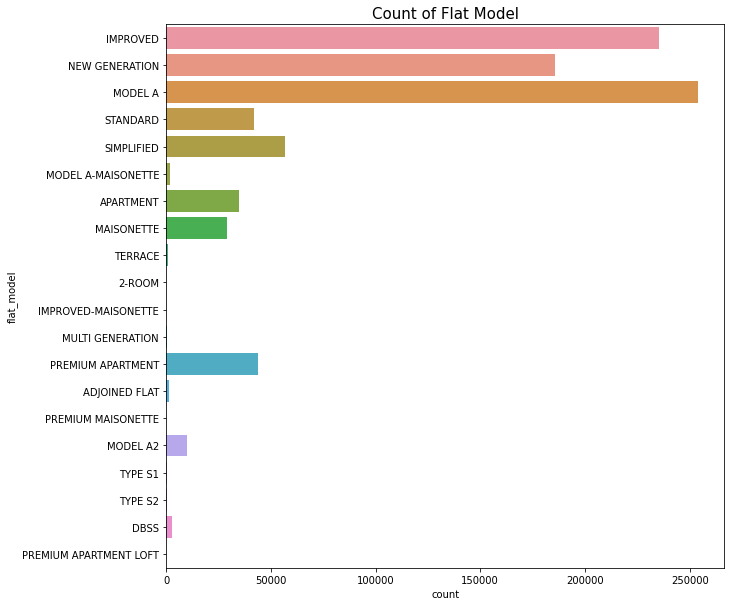

In [18]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y=df['flat_model'])
plt.title('Count of Flat Model', fontsize=15);

Observations:
1. It is observed that most of the houses are built in model A, Improved and New Generation
2. This also indicates that the general population of houses are built in model A, Improved and New Generation.
3. Potential buyers should potentially lookout for these houses as it would mean that these houses would be hotter in demand since it is regularly sold and bought on the propert market.

### Countplot: Count Of Flat Type

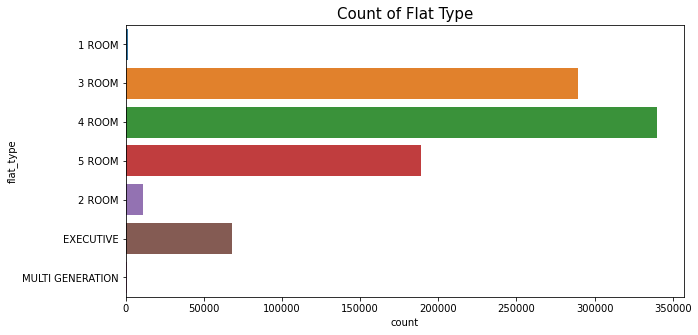

In [20]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y=df['flat_type'])
plt.title('Count of Flat Type', fontsize=15);
# ax.tick_params(axis='y', which='major', pad=10)

Observations:

1. This graph shows that most of the resale houses are generally 3 to 5 rooms. 
2. 4 rooms being the most common for resale flat.

### Countplot: Count Of Political Parties

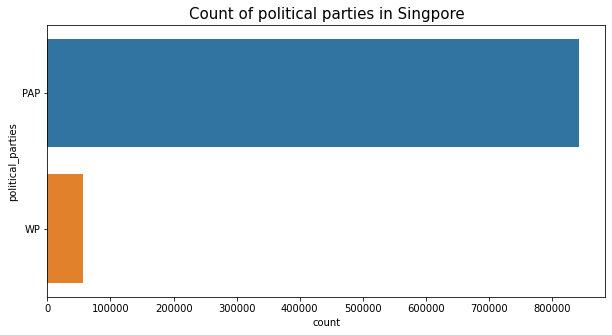

In [21]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y=df['political_parties'])
plt.title('Count of political parties in Singpore', fontsize=15);
# ax.tick_params(axis='y', which='major', pad=10)

This observation shows that majority of the areas over the years in singapore are overseen by PAP. 

### Data Cleaning

In [22]:
df['transaction_year'] = df['transaction_date'].dt.year
df['transaction_month'] = df['transaction_date'].dt.month
df['transaction_day'] = df['transaction_date'].dt.day

In [23]:
df['lease_commence_date'].dtype

dtype('<M8[ns]')

In [24]:
df['lease_year'] = df['lease_commence_date'].dt.year
df['lease_month'] = df['lease_commence_date'].dt.month
df['lease_day'] = df['lease_commence_date'].dt.day

In [25]:
df.drop(columns = ['transaction_date', 'lease_commence_date'], inplace=True)

In [26]:
df.drop(columns = ['lease_month', 'lease_day','transaction_day'], inplace=True)

In [27]:
df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,political_parties,remaining_lease_days,blk_num,blk_alpha,transaction_year,transaction_month,lease_year
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,9000.0,PAP,31411,309,-,1990,1,1977
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,6000.0,PAP,31411,309,-,1990,1,1977
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,8000.0,PAP,31411,309,-,1990,1,1977
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,6000.0,PAP,31411,309,-,1990,1,1977
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,47200.0,PAP,31046,216,-,1990,1,1976


In [28]:
df.to_csv('./datasets/cleaned_v2.csv', index=False)

# Summary

In summary, the following graphs has been explored:
1. Heatmap to understand correlation of datas
2. Histogram of resale houses over time to understand fluctuation of housing demands due to change in policies
3. Resale price over time to observe how prices of houses are changing over time
4. Type of resale houses in towns to understand which towns are hot in demand
5. Understanding how size of a resale house change over time
6. Observing what type of resale house model are popular
7. Understanding what flat type are the most common among resale flats.